# Assignment: Advanced Regression

In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read dataset
df_housing = pd.read_csv('train.csv')
df_housing.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# print info of dataset
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Data Cleaning & EDA

In [4]:
# Id is not required
df_housing.drop('Id', axis=1, inplace=True)

# MSSubClass is categorical
df_housing['MSSubClass'] = df_housing['MSSubClass'].astype('object')

In [5]:
# set max displayed rows and columns to 100
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [6]:
df_housing.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# find columns with null values
null_per = 100 * df_housing.isnull().sum() / df_housing.shape[0]
null_per[null_per > 0]

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

Many columns has a meaning full NA values. Those columns are:
- Alley
- BsmtQual
- BsmtCond
- BsmtExposure
- BsmtFinType1
- BsmtFinType2
- FireplaceQu
- GarageType
- GarageYrBlt
- GarageFinish
- GarageQual
- GarageCond
- PoolQC
- Fence
- MiscFeature

In [8]:
df_housing['Alley'].fillna('No Alley', inplace = True)
df_housing['BsmtQual'].fillna('No Basement', inplace = True)
df_housing['BsmtCond'].fillna('No Basement', inplace = True)
df_housing['BsmtExposure'].fillna('No Basement', inplace = True)
df_housing['BsmtFinType1'].fillna('No Basement', inplace = True)
df_housing['BsmtFinType2'].fillna('No Basement', inplace = True)
df_housing['FireplaceQu'].fillna('No Fireplace', inplace = True)
df_housing['GarageType'].fillna('No Garage', inplace = True)
df_housing['GarageYrBlt'].fillna('No Garage', inplace = True)
df_housing['GarageFinish'].fillna('No Garage', inplace = True)
df_housing['GarageQual'].fillna('No Garage', inplace = True)
df_housing['GarageCond'].fillna('No Garage', inplace = True)
df_housing['PoolQC'].fillna('No Fireplace', inplace = True)
df_housing['Fence'].fillna('No Fence', inplace = True)
df_housing['MiscFeature'].fillna('None', inplace = True)

In [9]:
# find columns with null values
null_per = 100 * df_housing.isnull().sum() / df_housing.shape[0]
null_per[null_per > 0]

LotFrontage    17.739726
MasVnrType      0.547945
MasVnrArea      0.547945
Electrical      0.068493
dtype: float64

#### Imputing LotFrontage

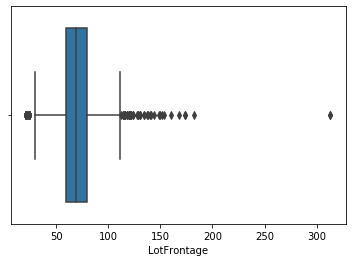

In [10]:
sns.boxplot(df_housing['LotFrontage'])
plt.show()

In [11]:
df_housing['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [12]:
# imputing with median
df_housing['LotFrontage'] = df_housing['LotFrontage'].fillna(df_housing['LotFrontage'].median())

#### Imputing MasVnrType

In [13]:
round(df_housing['MasVnrType'].value_counts(normalize=True) * 100, 2)

None       59.50
BrkFace    30.65
Stone       8.82
BrkCmn      1.03
Name: MasVnrType, dtype: float64

In [14]:
df_housing['MasVnrType'] = df_housing['MasVnrType'].fillna(df_housing['MasVnrType'].mode()[0])

#### Imputing MasVnrArea

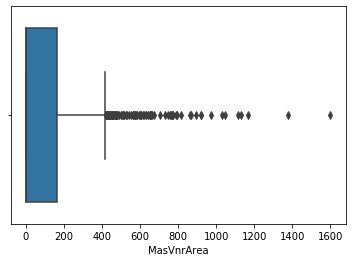

In [15]:
sns.boxplot(df_housing['MasVnrArea'])
plt.show()

In [16]:
df_housing.loc[df_housing['MasVnrArea'].isna(), ['MasVnrType', 'MasVnrArea']].head(100)

,MasVnrType,MasVnrArea
234,None,NaN
529,None,NaN
650,None,NaN
936,None,NaN
973,None,NaN
977,None,NaN
1243,None,NaN
1278,None,NaN


All these has MasVnrType None so let's set MasVnrArea to 0

In [17]:
df_housing['MasVnrArea'] = df_housing['MasVnrArea'].fillna(0)

#### Imputing Electrical

In [18]:
df_housing['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [19]:
df_housing['Electrical'].fillna(df_housing['Electrical'].mode()[0], inplace = True)

In [20]:
# remaining null values
null_per = 100 * df_housing.isnull().sum() / df_housing.shape[0]
null_per[null_per > 0]

Series([], dtype: float64)

#### Check If sale is normally distributed

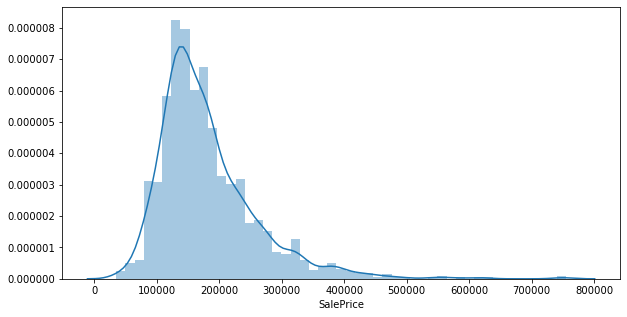

In [21]:
plt.figure(figsize=(10,5))
sns.distplot(df_housing['SalePrice'])
plt.show()

#### Log Transformation

In [22]:
df_housing['SalePrice'] = np.log(df_housing['SalePrice'])

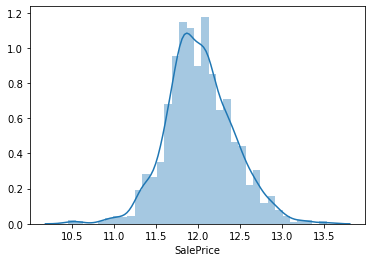

In [23]:
sns.distplot(df_housing['SalePrice'])
plt.show()

#### Drop highly skewed categorical columns

In [24]:
# find list of categorical columns
cat_columns = df_housing.select_dtypes('object').columns
cat_columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [25]:
# print value count in each column
for col in cat_columns:
    print(col + ':')
    print(round(100 * df_housing[col].value_counts(normalize=True), 2))
    print('-------------')

MSSubClass:
20     36.71
60     20.48
50      9.86
120     5.96
30      4.73
160     4.32
70      4.11
80      3.97
90      3.56
190     2.05
85      1.37
75      1.10
45      0.82
180     0.68
40      0.27
Name: MSSubClass, dtype: float64
-------------
MSZoning:
RL         78.84
RM         14.93
FV          4.45
RH          1.10
C (all)     0.68
Name: MSZoning, dtype: float64
-------------
Street:
Pave    99.59
Grvl     0.41
Name: Street, dtype: float64
-------------
Alley:
No Alley    93.77
Grvl         3.42
Pave         2.81
Name: Alley, dtype: float64
-------------
LotShape:
Reg    63.36
IR1    33.15
IR2     2.81
IR3     0.68
Name: LotShape, dtype: float64
-------------
LandContour:
Lvl    89.79
Bnk     4.32
HLS     3.42
Low     2.47
Name: LandContour, dtype: float64
-------------
Utilities:
AllPub    99.93
NoSeWa     0.07
Name: Utilities, dtype: float64
-------------
LotConfig:
Inside     72.05
Corner     18.01
CulDSac     6.44
FR2         3.22
FR3         0.27
Name: LotConfig, dt

In [26]:
# find list of highly skewed columns
skewed_cols = []
for col in cat_columns:
    per_count = 100 * df_housing[col].value_counts(normalize=True)
    if per_count.iloc[0] >= 99:
        skewed_cols.append(col)
print(skewed_cols)

['Street', 'Utilities', 'PoolQC']


In [27]:
# drop highly skewed columns
df_housing = df_housing.drop(skewed_cols, axis=1)

#### Merge low percentage categories

In [28]:
# print value count in each categorical column
cat_columns = df_housing.select_dtypes('object').columns
for col in cat_columns:
    print(col + ':')
    print(round(100 * df_housing[col].value_counts(normalize=True), 2))
    print('-------------')

MSSubClass:
20     36.71
60     20.48
50      9.86
120     5.96
30      4.73
160     4.32
70      4.11
80      3.97
90      3.56
190     2.05
85      1.37
75      1.10
45      0.82
180     0.68
40      0.27
Name: MSSubClass, dtype: float64
-------------
MSZoning:
RL         78.84
RM         14.93
FV          4.45
RH          1.10
C (all)     0.68
Name: MSZoning, dtype: float64
-------------
Alley:
No Alley    93.77
Grvl         3.42
Pave         2.81
Name: Alley, dtype: float64
-------------
LotShape:
Reg    63.36
IR1    33.15
IR2     2.81
IR3     0.68
Name: LotShape, dtype: float64
-------------
LandContour:
Lvl    89.79
Bnk     4.32
HLS     3.42
Low     2.47
Name: LandContour, dtype: float64
-------------
LotConfig:
Inside     72.05
Corner     18.01
CulDSac     6.44
FR2         3.22
FR3         0.27
Name: LotConfig, dtype: float64
-------------
LandSlope:
Gtl    94.66
Mod     4.45
Sev     0.89
Name: LandSlope, dtype: float64
-------------
Neighborhood:
NAmes      15.41
CollgCr    10.

In [29]:
# function to merge low percentage values and rename it 'Others'
def replace_with_others(col, per):
    temp = round(100 * df_housing[col].value_counts(normalize=True), 2)
    temp = temp[temp < per]
    df_housing[col] = df_housing[col].apply(lambda x : 'Others' if x in temp.index else x)

In [30]:
# merge low percentage values
replace_with_others('Alley', 5)
replace_with_others('LotShape', 5)
replace_with_others('LotConfig', 5)
replace_with_others('LandSlope', 5)
replace_with_others('Neighborhood', 2)
replace_with_others('Condition1', 5)
replace_with_others('Condition2', 1)
replace_with_others('BldgType', 5)
replace_with_others('HouseStyle', 3)
replace_with_others('RoofStyle', 5)
replace_with_others('RoofMatl', 5)
replace_with_others('Exterior1st', 1)
replace_with_others('Exterior2nd', 1)
replace_with_others('MasVnrType', 10)
replace_with_others('ExterCond', 5)
replace_with_others('Foundation', 5)
replace_with_others('Heating', 5)
replace_with_others('HeatingQC', 5)
replace_with_others('Electrical', 5)
replace_with_others('Functional', 5)
replace_with_others('FireplaceQu', 5)
replace_with_others('MiscFeature', 5)
replace_with_others('SaleType', 5)
replace_with_others('SaleCondition', 5)
replace_with_others('BsmtQual', 5)
replace_with_others('BsmtCond', 5)
replace_with_others('BsmtFinType1', 7)
replace_with_others('BsmtFinType2', 5)
replace_with_others('GarageQual', 6)
replace_with_others('GarageCond', 6)
replace_with_others('LandContour', 5)

#### Converting Year columns to Age Column

In [31]:
from datetime import date

In [32]:
# find the oldest year in garage
old_year = df_housing.loc[df_housing['GarageYrBlt'] != 'No Garage','GarageYrBlt'].astype('int').min()
old_year

1900

In [33]:
cur_year = int(date.today().year)
df_housing['GarageAge'] = df_housing['GarageYrBlt'].apply(lambda x : old_year if x == 'No Garage' else cur_year - int(x)).astype('int')
df_housing['BuildAge'] = df_housing['YearBuilt'].apply(lambda x :cur_year - int(x))
df_housing['RemodelAge'] = df_housing['YearRemodAdd'].apply(lambda x :cur_year - int(x))
df_housing['SoldAge'] = df_housing['YrSold'].apply(lambda x :cur_year - int(x))
df_housing = df_housing.drop(['GarageYrBlt', 'YearBuilt', 'YearRemodAdd', 'YrSold'], axis=1)
df_housing.loc[:,['GarageAge', 'BuildAge', 'RemodelAge', 'SoldAge']].head()

,GarageAge,BuildAge,RemodelAge,SoldAge
0,17,17,17,12
1,44,44,44,13
2,19,19,18,12
3,22,105,50,14
4,20,20,20,12


### Creating Dummies

In [34]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Alley          1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  RoofStyle      1460 non-null   object 
 17  RoofMatl       1460 non-null   object 
 18  Exterior

In [35]:
# find list of categorical columns
cat_cols = df_housing.select_dtypes('object').columns
cat_cols

Index(['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [36]:
# list of columns for which we merged the values and name them 'others'
col_with_others = ['Alley', 'LotShape', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 
                   'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterCond', 
                   'Foundation', 'Heating', 'HeatingQC', 'Electrical', 'Functional', 'FireplaceQu', 'MiscFeature', 
                   'SaleType', 'SaleCondition','BsmtQual', 'BsmtCond', 'BsmtFinType1','BsmtFinType2', 'GarageQual', 
                   'GarageCond', 'LandContour']

In [37]:
# creating dummies for variables for which we previously merge catgeories as 'Others'
# and droping the Others instead of drop first to make better understandable from business prespective
for col in col_with_others:
    dummies = pd.get_dummies(df_housing[col], prefix=col)
    dummies.drop(f'{col}_Others', axis=1, inplace=True)
    df_housing = pd.concat([df_housing, dummies], axis=1)
    df_housing.drop(col, axis=1, inplace=True)

df_housing.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,SalePrice,GarageAge,BuildAge,RemodelAge,SoldAge,Alley_No Alley,LotShape_IR1,LotShape_Reg,LotConfig_Corner,...,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,ExterCond_Gd,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Heating_GasA,HeatingQC_Ex,HeatingQC_Gd,HeatingQC_TA,Electrical_FuseA,Electrical_SBrkr,Functional_Typ,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_TA,MiscFeature_None,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial,BsmtQual_Ex,BsmtQual_Gd,BsmtQual_TA,BsmtCond_TA,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_Unf,GarageQual_TA,GarageCond_TA,LandContour_Lvl
0,60,RL,65.0,8450,7,5,196.0,Gd,No,706,0,150,856,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,Attchd,RFn,2,548,Y,0,61,0,0,0,0,No Fence,0,2,12.247694,17,17,17,12,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,1,1,1
1,20,RL,80.0,9600,6,8,0.0,TA,Gd,978,0,284,1262,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,Attchd,RFn,2,460,Y,298,0,0,0,0,0,No Fence,0,5,12.109011,44,44,44,13,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,0,0,0,1,1,1,1
2,60,RL,68.0,11250,7,5,162.0,Gd,Mn,486,0,434,920,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,Attchd,RFn,2,608,Y,0,42,0,0,0,0,No Fence,0,9,12.317167,19,19,18,12,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,1,1,1
3,70,RL,60.0,9550,7,5,0.0,TA,No,216,0,540,756,Y,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Detchd,Unf,3,642,Y,0,35,272,0,0,0,No Fence,0,2,11.849398,22,105,50,14,1,1,0,1,...,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,0,0,1,1,1,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,1,1,1
4,60,RL,84.0,14260,8,5,350.0,Gd,Av,655,0,490,1145,Y,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,Attchd,RFn,3,836,Y,192,84,0,0,0,0,No Fence,0,12,12.429216,20,20,20,12,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,1,1,1


In [38]:
# list of remaining categorical columns
rem_cat_cols = cat_cols.drop(col_with_others)
rem_cat_cols

Index(['MSSubClass', 'MSZoning', 'ExterQual', 'BsmtExposure', 'CentralAir',
       'KitchenQual', 'GarageType', 'GarageFinish', 'PavedDrive', 'Fence'],
      dtype='object')

In [39]:
# creating dummies for remaining catgorical columns
for col in rem_cat_cols:
    dummies = pd.get_dummies(df_housing[col], prefix=col, drop_first = True)
    df_housing = pd.concat([df_housing, dummies], axis=1)
    df_housing.drop(col, axis=1, inplace=True)

df_housing.head(5)

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,GarageAge,BuildAge,RemodelAge,SoldAge,Alley_No Alley,LotShape_IR1,LotShape_Reg,LotConfig_Corner,LotConfig_CulDSac,LotConfig_Inside,LandSlope_Gtl,Neighborhood_BrkSide,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,...,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_Unf,GarageQual_TA,GarageCond_TA,LandContour_Lvl,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence
0,65.0,8450,7,5,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,12.247694,17,17,17,12,1,0,1,0,0,1,1,0,1,0,0,0,0,0,...,0,0,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1
1,80.0,9600,6,8,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,12.109011,44,44,44,13,1,0,1,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1
2,68.0,11250,7,5,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,12.317167,19,19,18,12,1,1,0,0,0,1,1,0,1,0,0,0,0,0,...,0,0,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1
3,60.0,9550,7,5,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,11.849398,22,105,50,14,1,1,0,1,0,0,1,0,0,1,0,0,0,0,...,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1
4,84.0,14260,8,5,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,12.429216,20,20,20,12,1,1,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1


## Prepration for Model Building

### Train-Test split

In [40]:
# import train_test_split
from sklearn.model_selection import train_test_split

In [41]:
# Features data set
X = df_housing.drop('SalePrice', axis=1)
X.head(1)

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,GarageAge,BuildAge,RemodelAge,SoldAge,Alley_No Alley,LotShape_IR1,LotShape_Reg,LotConfig_Corner,LotConfig_CulDSac,LotConfig_Inside,LandSlope_Gtl,Neighborhood_BrkSide,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,...,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_Unf,GarageQual_TA,GarageCond_TA,LandContour_Lvl,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence
0,65.0,8450,7,5,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,17,17,17,12,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,...,0,0,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1


In [42]:
# target field
y = df_housing['SalePrice']
y.head(1)

0    12.247694
Name: SalePrice, dtype: float64

In [43]:
# performing test train split with 70-30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

### Feature Scaling

In [44]:
# importing Standard Scaler
from sklearn.preprocessing import StandardScaler

In [45]:
# perform scaling
scaler = StandardScaler()
columns = X_train.columns
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_train.columns = columns

X_test = pd.DataFrame(scaler.transform(X_test))
X_test.columns = columns

## RFE

In [46]:
# import linear regression to be used for RFE
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [47]:
X_train.shape

(1021, 170)

In [48]:
y_train.shape

(1021,)

In [49]:
# performing RFE with linear regression to get 20 final variables
from sklearn.feature_selection import RFE

rfe = RFE(lin_reg, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [50]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('LotFrontage', False, 25),
 ('LotArea', False, 17),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 92),
 ('BsmtFinSF1', False, 33),
 ('BsmtFinSF2', False, 34),
 ('BsmtUnfSF', False, 29),
 ('TotalBsmtSF', False, 27),
 ('1stFlrSF', False, 30),
 ('2ndFlrSF', False, 31),
 ('LowQualFinSF', False, 32),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 134),
 ('FullBath', False, 15),
 ('HalfBath', False, 18),
 ('BedroomAbvGr', False, 97),
 ('KitchenAbvGr', False, 12),
 ('TotRmsAbvGrd', False, 4),
 ('Fireplaces', False, 94),
 ('GarageCars', True, 1),
 ('GarageArea', False, 98),
 ('WoodDeckSF', False, 46),
 ('OpenPorchSF', False, 149),
 ('EnclosedPorch', False, 58),
 ('3SsnPorch', False, 78),
 ('ScreenPorch', False, 26),
 ('PoolArea', False, 86),
 ('MiscVal', False, 130),
 ('MoSold', False, 74),
 ('GarageAge', False, 23),
 ('BuildAge', True, 1),
 ('RemodelAge', False, 21),
 ('SoldAge', False, 103),
 ('Alley_No Alley', False, 64),
 ('Lo

In [51]:
# columns selected after RFE
cols = rfe.support_
X_train.columns[cols]

Index(['OverallQual', 'OverallCond', 'GrLivArea', 'BsmtFullBath', 'GarageCars',
       'BuildAge', 'Condition1_Norm', 'Exterior1st_BrkFace', 'HeatingQC_Ex',
       'HeatingQC_Gd', 'HeatingQC_TA', 'FireplaceQu_No Fireplace',
       'SaleType_New', 'SaleCondition_Partial', 'BsmtQual_Ex',
       'MSSubClass_160', 'MSZoning_FV', 'MSZoning_RL', 'MSZoning_RM',
       'BsmtExposure_Gd'],
      dtype='object')

### Correlations


In [52]:
X_train = X_train.loc[:,cols]
X_test = X_test.loc[:,cols]

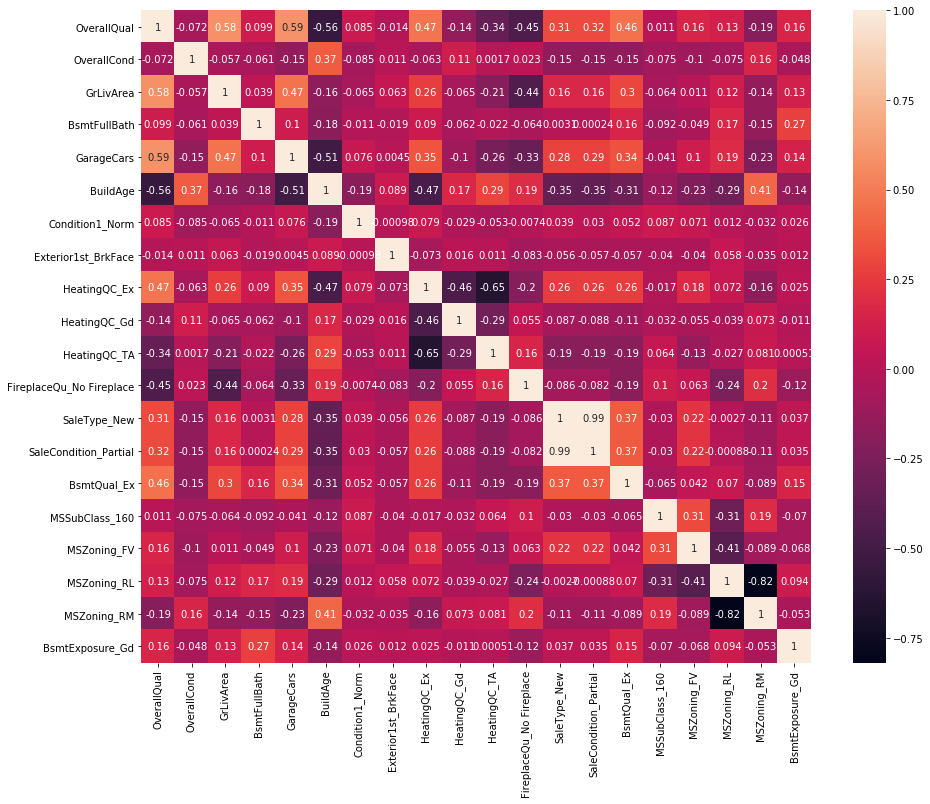

In [53]:
# plot correlation between selected columns
plt.figure(figsize=(15,12))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

## Model Building

### Lasso Regression

In [54]:
# import libraries required for lasso
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [55]:
# list of alphas to be checked (Hyperparameter tunnig)
params = {'alpha': [0,0.0000000001, 0.00000001, 0.0000001,0.000001, 0.00001, 0.0001, 0.0002, 
                    0.0005, 0.001, 0.002, 0.005, 0.01, 0.02]}

In [56]:
# GridSearch with lasso for all the parmas
lasso = Lasso()

model_cv = GridSearchCV(estimator=lasso, param_grid=params, 
                        scoring='r2', cv=5,
                        return_train_score=True, verbose=1)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\ragnar\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
c:\users\ragnar\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\users\ragnar\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.680902649991188, tolerance: 0.012582437459356447
  model = cd_fast.enet_coordinate_descent(
c:\users\ragnar\appdata\local\pro

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0, 1e-10, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001,
                                   0.0002, 0.0005, 0.001, 0.002, 0.005, 0.01,
                                   0.02]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [57]:
# Grid search results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.070963,0.029284,0.000999,6.468134e-07,0,{'alpha': 0},0.892017,0.674174,0.880721,0.896669,0.882274,0.845171,0.085705,9,0.862016,0.906883,0.862091,0.862641,0.865526,0.871832,0.017573
1,0.048570,0.016896,0.001600,4.902537e-04,1e-10,{'alpha': 1e-10},0.892017,0.674174,0.880721,0.896669,0.882274,0.845171,0.085705,8,0.862016,0.906883,0.862091,0.862641,0.865526,0.871832,0.017573
2,0.041774,0.015500,0.001201,4.047156e-04,1e-08,{'alpha': 1e-08},0.892017,0.674174,0.880721,0.896669,0.882275,0.845171,0.085705,7,0.862016,0.906883,0.862091,0.862641,0.865526,0.871832,0.017573
3,0.035578,0.013697,0.001199,4.019267e-04,1e-07,{'alpha': 1e-07},0.892017,0.674174,0.880720,0.896669,0.882275,0.845171,0.085705,6,0.862016,0.906883,0.862091,0.862641,0.865526,0.871832,0.017573
4,0.024987,0.009029,0.001397,4.882860e-04,1e-06,{'alpha': 1e-06},0.892019,0.674175,0.880718,0.896671,0.882278,0.845172,0.085706,5,0.862016,0.906883,0.862091,0.862641,0.865526,0.871832,0.017573


In [58]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

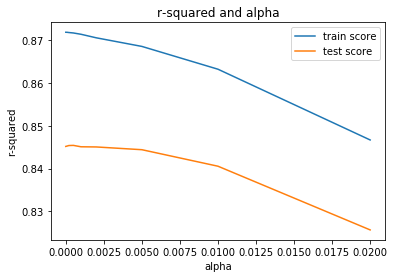

In [59]:
# plot alpha vs r-squared
plt.xlabel('alpha')
plt.ylabel('r-squared')
plt.title("r-squared and alpha")
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])

plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [60]:
# best value for alpha
model_cv.best_params_

{'alpha': 0.0005}

In [61]:
# build lasso model with the best value
alpha = 0.0005

lasso = Lasso(alpha = alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [62]:
# list of coefficient calculated using lasso
lasso.coef_

array([ 0.11373544,  0.05734483,  0.12071785,  0.0365066 ,  0.06743638,
       -0.07281679,  0.02657028,  0.0227095 ,  0.04698556,  0.02287636,
        0.02243549, -0.03535597,  0.        ,  0.00893847,  0.02277893,
       -0.02928518,  0.02753411,  0.03224395, -0.00755808,  0.02124147])

In [63]:
# features and their respective coefficients
list(zip(X_train.columns, lasso.coef_))

[('OverallQual', 0.11373544182911774),
 ('OverallCond', 0.05734483164474737),
 ('GrLivArea', 0.12071784586418968),
 ('BsmtFullBath', 0.03650659734620352),
 ('GarageCars', 0.06743637731292948),
 ('BuildAge', -0.07281679393958765),
 ('Condition1_Norm', 0.026570275700952092),
 ('Exterior1st_BrkFace', 0.022709501944310196),
 ('HeatingQC_Ex', 0.04698556458390081),
 ('HeatingQC_Gd', 0.022876356508526347),
 ('HeatingQC_TA', 0.022435490613196652),
 ('FireplaceQu_No Fireplace', -0.03535596818282298),
 ('SaleType_New', 0.0),
 ('SaleCondition_Partial', 0.00893846513507193),
 ('BsmtQual_Ex', 0.02277893327644801),
 ('MSSubClass_160', -0.029285183155124076),
 ('MSZoning_FV', 0.027534111665103125),
 ('MSZoning_RL', 0.03224394780995588),
 ('MSZoning_RM', -0.007558077427596336),
 ('BsmtExposure_Gd', 0.02124147157354683)]

In [64]:
# print in order
series = pd.Series(lasso.coef_)
series.index = X_train.columns
series.sort_values(ascending = False)

GrLivArea                   0.120718
OverallQual                 0.113735
GarageCars                  0.067436
OverallCond                 0.057345
HeatingQC_Ex                0.046986
BsmtFullBath                0.036507
MSZoning_RL                 0.032244
MSZoning_FV                 0.027534
Condition1_Norm             0.026570
HeatingQC_Gd                0.022876
BsmtQual_Ex                 0.022779
Exterior1st_BrkFace         0.022710
HeatingQC_TA                0.022435
BsmtExposure_Gd             0.021241
SaleCondition_Partial       0.008938
SaleType_New                0.000000
MSZoning_RM                -0.007558
MSSubClass_160             -0.029285
FireplaceQu_No Fireplace   -0.035356
BuildAge                   -0.072817
dtype: float64

In [65]:
# train score
train_score = round(lasso.score(X_train, y_train),2)
print(f'Train score is {train_score}')

Train score is 0.87


In [66]:
# test score
test_score = round(lasso.score(X_test, y_test), 2)
print(f'Test score is {test_score}')

Test score is 0.88


### Ridge

In [67]:
# import librares for ridge
from sklearn.linear_model import Ridge
ridge = Ridge()

In [68]:
# Hyperparameter tunning for ridge regression
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500 ]}


model_cv = GridSearchCV(estimator=ridge, param_grid=params, scoring='r2', cv=5,
                       return_train_score=True, verbose=1)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [69]:
# GridSearchCV results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003120,0.006240,0.003125,0.006249,0.0001,{'alpha': 0.0001},0.892017,0.674174,0.880721,0.896787,0.882274,0.845195,0.085719,26,0.862016,0.906883,0.862091,0.862641,0.865526,0.871832,0.017573
1,0.000000,0.000000,0.000000,0.000000,0.001,{'alpha': 0.001},0.892017,0.674175,0.880721,0.896787,0.882275,0.845195,0.085719,25,0.862016,0.906883,0.862091,0.862641,0.865526,0.871832,0.017573
2,0.000000,0.000000,0.000000,0.000000,0.01,{'alpha': 0.01},0.892018,0.674179,0.880720,0.896788,0.882276,0.845196,0.085718,24,0.862016,0.906883,0.862091,0.862641,0.865526,0.871832,0.017573
3,0.003126,0.006252,0.003125,0.006250,0.05,{'alpha': 0.05},0.892022,0.674200,0.880717,0.896791,0.882281,0.845202,0.085710,23,0.862016,0.906883,0.862091,0.862641,0.865526,0.871832,0.017573
4,0.002750,0.000646,0.000800,0.000400,0.1,{'alpha': 0.1},0.892027,0.674226,0.880714,0.896795,0.882287,0.845210,0.085701,22,0.862016,0.906883,0.862091,0.862641,0.865526,0.871831,0.017573


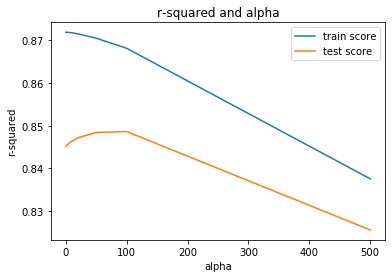

In [70]:
# plot r-squared vs alpha
plt.xlabel('alpha')
plt.ylabel('r-squared')
plt.title("r-squared and alpha")

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])

plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [71]:
# best value for alpha
model_cv.best_params_

{'alpha': 100}

In [72]:
# build ridge model with best value of alpha
alpha = 100

ridge = Ridge(alpha = alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [73]:
# coefficients calcuated using ridge
ridge.coef_

array([ 0.10811918,  0.05099365,  0.11018083,  0.03449495,  0.06883113,
       -0.06484775,  0.02460199,  0.02056311,  0.03357979,  0.01007528,
        0.00498016, -0.03891559,  0.00422486,  0.00760683,  0.02497376,
       -0.02511734,  0.0207668 ,  0.02271495, -0.01887993,  0.02248332])

In [74]:
# features with their respective coefficients
list(zip(X_train.columns, ridge.coef_))

[('OverallQual', 0.10811917993334484),
 ('OverallCond', 0.0509936463625146),
 ('GrLivArea', 0.11018083374827557),
 ('BsmtFullBath', 0.0344949520894833),
 ('GarageCars', 0.0688311286026936),
 ('BuildAge', -0.06484775361001456),
 ('Condition1_Norm', 0.02460198591357752),
 ('Exterior1st_BrkFace', 0.02056311458067404),
 ('HeatingQC_Ex', 0.033579787092538456),
 ('HeatingQC_Gd', 0.010075277856529778),
 ('HeatingQC_TA', 0.004980159585069441),
 ('FireplaceQu_No Fireplace', -0.03891558709079326),
 ('SaleType_New', 0.004224855501157735),
 ('SaleCondition_Partial', 0.007606825800372559),
 ('BsmtQual_Ex', 0.02497376153322082),
 ('MSSubClass_160', -0.025117338022251256),
 ('MSZoning_FV', 0.02076679753687052),
 ('MSZoning_RL', 0.02271495435193594),
 ('MSZoning_RM', -0.018879930094538797),
 ('BsmtExposure_Gd', 0.02248332389747589)]

In [75]:
# print in order
series = pd.Series(ridge.coef_)
series.index = X_train.columns
series.sort_values(ascending = False)

GrLivArea                   0.110181
OverallQual                 0.108119
GarageCars                  0.068831
OverallCond                 0.050994
BsmtFullBath                0.034495
HeatingQC_Ex                0.033580
BsmtQual_Ex                 0.024974
Condition1_Norm             0.024602
MSZoning_RL                 0.022715
BsmtExposure_Gd             0.022483
MSZoning_FV                 0.020767
Exterior1st_BrkFace         0.020563
HeatingQC_Gd                0.010075
SaleCondition_Partial       0.007607
HeatingQC_TA                0.004980
SaleType_New                0.004225
MSZoning_RM                -0.018880
MSSubClass_160             -0.025117
FireplaceQu_No Fireplace   -0.038916
BuildAge                   -0.064848
dtype: float64

In [76]:
# Train score
round(ridge.score(X_train, y_train), 2)
print(f'Train score is {train_score}')

Train score is 0.87


In [77]:
# Test score
round(ridge.score(X_test, y_test), 2)
print(f'Test score is {test_score}')

Test score is 0.88


## Conclusion

<b>
Both ridge and lasso models are performing well and have almost similar score for train and test data. The train and test score are also very close that means the model is good, there is no case of underfitting or overfitting.
<br>
<br>
For our final usage we will choose the lasso model because it has 1 less number of feature with same prediction power which make the model simplier. And also that features doesn't even have that much business significance
    
Below is the list final features with their coefficients
</b>

In [78]:
# print list of features and their coefficients selected with lasso
final_coef = lasso.coef_[lasso.coef_ != 0]
columns = X_train.columns.drop('SaleType_New')
lst = list(zip(columns, final_coef))
for item in lst:
    print(f'{item[0]} : {item[1]}')

OverallQual : 0.11373544182911774
OverallCond : 0.05734483164474737
GrLivArea : 0.12071784586418968
BsmtFullBath : 0.03650659734620352
GarageCars : 0.06743637731292948
BuildAge : -0.07281679393958765
Condition1_Norm : 0.026570275700952092
Exterior1st_BrkFace : 0.022709501944310196
HeatingQC_Ex : 0.04698556458390081
HeatingQC_Gd : 0.022876356508526347
HeatingQC_TA : 0.022435490613196652
FireplaceQu_No Fireplace : -0.03535596818282298
SaleCondition_Partial : 0.00893846513507193
BsmtQual_Ex : 0.02277893327644801
MSSubClass_160 : -0.029285183155124076
MSZoning_FV : 0.027534111665103125
MSZoning_RL : 0.03224394780995588
MSZoning_RM : -0.007558077427596336
BsmtExposure_Gd : 0.02124147157354683
